Nama    :Nasywa Agiyan Nisa

Email   :nasywaagiyann@gmail.com

GitHub  :github.com/nasywaagiyann

# **SQL Queries and Data Visualization in Bike Store DB**

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from datetime import datetime

## Read CSV

In [ ]:
# Membaca semua file CSV dan menyimpannya dalam dictionary dfs
dfs = {
    'products': pd.read_csv('products.csv'),
    'brands': pd.read_csv('brands.csv'),
    'categories': pd.read_csv('categories.csv'),
    'order_items': pd.read_csv('order_items.csv'),
    'staffs': pd.read_csv('staffs.csv'),
    'orders': pd.read_csv('orders.csv'),
    'stores': pd.read_csv('stores.csv'),
    'customers': pd.read_csv('customers.csv'),
    'stocks': pd.read_csv('stocks.csv'),
}

brands = dfs['brands']

## Create Database Connection

In [ ]:
db = sqlite3.connect('bike_store.db')

# Simpan semua DataFrame ke dalam database
for name, df in dfs.items():
    df.to_sql(name, db, if_exists='replace', index=False)


In [ ]:
# Simpan DataFrame ke dalam tabel SQL 'brands'
brands.to_sql(
    'brands',
    db,
    if_exists='replace',
    index=False
)


9

In [ ]:
# Simpan semua dataframe ke SQLite
for name, df in dfs.items():
    df.to_sql(name, db, if_exists='replace', index=False)


In [ ]:
brands

,brand_id,brand_name
0,1,Electra
1,2,Haro
2,3,Heller
3,4,Pure Cycles
4,5,Ritchey
5,6,Strider
6,7,Sun Bicycles
7,8,Surly
8,9,Trek


In [ ]:
print("Number of rows:")
print("brands:", len(brands))
for table in ['categories', 'customers', 'order_items', 'orders', 'products', 'staffs', 'stocks', 'stores']:
    print(f"{table}:", len(dfs[table]))

Number of rows:
brands: 9
categories: 7
customers: 1445
order_items: 4722
orders: 1615
products: 321
staffs: 10
stocks: 939
stores: 3


In [ ]:
brands.to_sql('brands', db, if_exists='replace', index=False)
print("number of rows in brands: " + str(len(brands)))


number of rows in brands: 9


## Show Tables

In [ ]:
# List nama tabel yang ingin di-query
table_names = ['brands', 'categories', 'customers', 'order_items', 'orders', 'products', 'staffs', 'stocks', 'stores']
dfs = {}

# Loop untuk membaca data dari setiap tabel dan menyimpannya ke dalam dictionary dfs
for table in table_names:
    query = f"SELECT * FROM {table};"
    dfs[table] = pd.read_sql_query(query, db)


In [ ]:
# Contoh untuk mengakses DataFrame brands:
df1 = dfs['brands']

# Membuat perubahan dan menyimpan kembali ke database
df1.to_sql("brands_test", db, if_exists="replace", index=False)

9

## Analysis of Bike Store

### All the unique brand name

In [ ]:
# Akses DataFrame 'products' lalu kolom 'product_name'
unique_product_names = dfs['products']['product_name'].unique().tolist()
unique_product_names


['Trek 820 - 2016',
 'Ritchey Timberwolf Frameset - 2016',
 'Surly Wednesday Frameset - 2016',
 'Trek Fuel EX 8 29 - 2016',
 'Heller Shagamaw Frame - 2016',
 'Surly Ice Cream Truck Frameset - 2016',
 'Trek Slash 8 27.5 - 2016',
 'Trek Remedy 29 Carbon Frameset - 2016',
 'Trek Conduit+ - 2016',
 'Surly Straggler - 2016',
 'Surly Straggler 650b - 2016',
 'Electra Townie Original 21D - 2016',
 'Electra Cruiser 1 (24-Inch) - 2016',
 "Electra Girl's Hawaii 1 (16-inch) - 2015/2016",
 'Electra Moto 1 - 2016',
 'Electra Townie Original 7D EQ - 2016',
 'Pure Cycles Vine 8-Speed - 2016',
 "Pure Cycles Western 3-Speed - Women's - 2015/2016",
 'Pure Cycles William 3-Speed - 2016',
 "Electra Townie Original 7D EQ - Women's - 2016",
 "Electra Girl's Hawaii 1 (20-inch) - 2015/2016",
 'Electra Townie Original 7D - 2015/2016',
 'Surly Big Dummy Frameset - 2017',
 'Surly Karate Monkey 27.5+ Frameset - 2017',
 'Trek X-Caliber 8 - 2017',
 'Surly Ice Cream Truck Frameset - 2017',
 'Surly Wednesday - 2017',

### Number of stocks based on category name and store name

In [ ]:
# Baca semua tabel yang diperlukan dari database
categories = pd.read_sql_query('SELECT * FROM categories', db)
products = pd.read_sql_query('SELECT * FROM products', db)
stocks = pd.read_sql_query('SELECT * FROM stocks', db)
stores = pd.read_sql_query('SELECT * FROM stores', db)


In [ ]:
# Join categories dan products berdasarkan category_id
df1 = pd.merge(products, categories, on="category_id", how="inner")

# Join hasil pertama dengan stocks berdasarkan product_id
df2 = pd.merge(df1, stocks, on="product_id", how="inner")

# Join hasil kedua dengan stores berdasarkan store_id
df3 = pd.merge(df2, stores, on="store_id", how="inner")


In [ ]:
# Lakukan agregasi (sum) berdasarkan store_name dan category_name
result1 = df3.groupby(['store_name', 'category_name'], as_index=False).agg({'quantity': 'sum'})

# Mengurutkan hasil berdasarkan store_name dan category_name
result1 = result1.sort_values(by=['store_name', 'category_name'])
result1


,store_name,category_name,quantity
0,Baldwin Bikes,Children Bicycles,769
1,Baldwin Bikes,Comfort Bicycles,393
2,Baldwin Bikes,Cruisers Bicycles,1137
3,Baldwin Bikes,Cyclocross Bicycles,97
4,Baldwin Bikes,Electric Bikes,328
5,Baldwin Bikes,Mountain Bikes,877
6,Baldwin Bikes,Road Bikes,758
7,Rowlett Bikes,Children Bicycles,887
8,Rowlett Bikes,Comfort Bicycles,440
9,Rowlett Bikes,Cruisers Bicycles,1148


### Number of unique stores

In [ ]:
print(f'There are {result1["store_name"].nunique()} stores in total, with the following store names: {result1["store_name"].unique().tolist()}')

There are 3 stores in total, with the following store names: ['Baldwin Bikes', 'Rowlett Bikes', 'Santa Cruz Bikes']


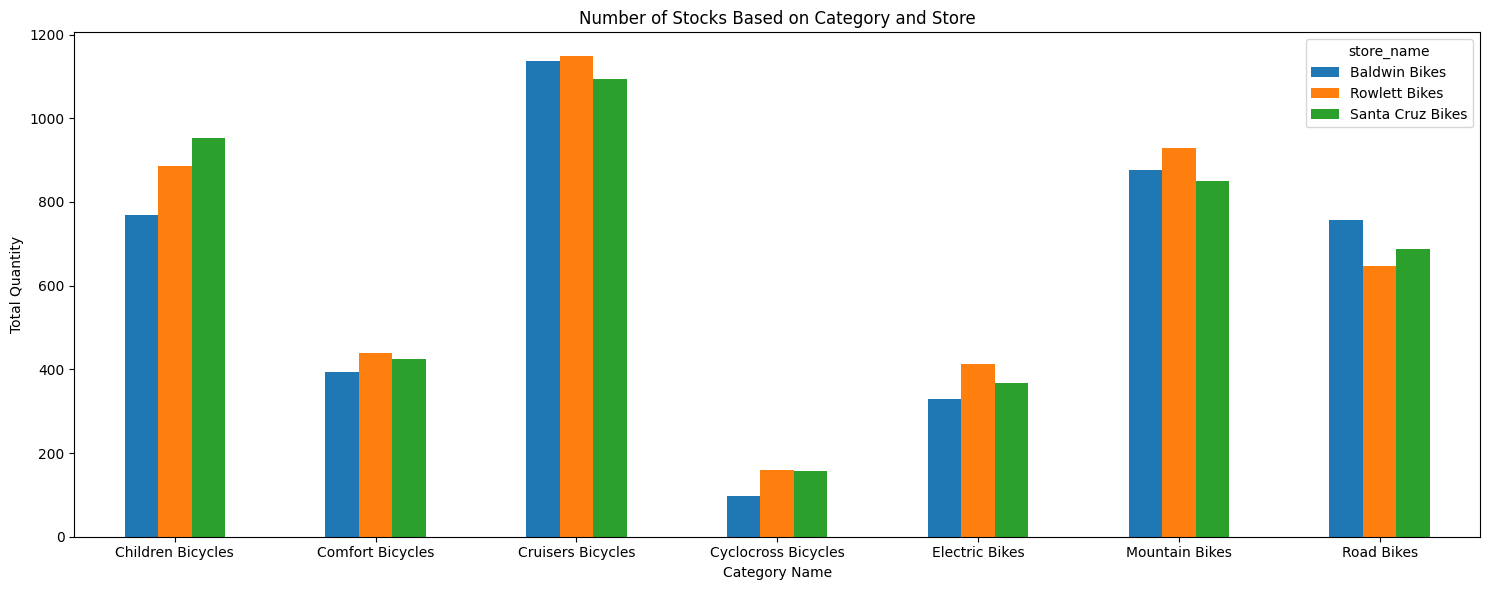

In [ ]:
pivot = result1.groupby(['category_name', 'store_name'])['quantity'].sum().unstack()

# Visualisasi
ax = pivot.plot(kind='bar', figsize=(15, 6))
plt.title('Number of Stocks Based on Category and Store')
plt.xlabel('Category Name')
plt.ylabel('Total Quantity')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### No. of order items based on category name from each store.

In [ ]:
# Baca semua tabel yang diperlukan dari database
categories = pd.read_sql_query('SELECT * FROM categories', db)
products = pd.read_sql_query('SELECT * FROM products', db)
order_items = pd.read_sql_query('SELECT * FROM order_items', db)
orders = pd.read_sql_query('SELECT * FROM orders', db)
stores = pd.read_sql_query('SELECT * FROM stores', db)


In [ ]:
# Gabungkan tabel-tabel yang diperlukan menggunakan Pandas merge
df = pd.merge(categories, products, on='category_id', how='inner')  # Join categories and products
df = pd.merge(df, order_items, on='product_id', how='inner')         # Join with order_items
df = pd.merge(df, orders, on='order_id', how='inner')                # Join with orders
df = pd.merge(df, stores, on='store_id', how='inner')                # Join with stores


In [ ]:
# Lakukan agregasi dan pengelompokan sesuai dengan query
result2 = df.groupby(['category_name', 'store_name'], as_index=False)['quantity'].sum()


In [ ]:
# Mengganti nama kolom 'quantity' menjadi 'total_quantity' untuk kejelasan
result2 = result2.rename(columns={'quantity': 'total_quantity'})

In [ ]:
# Urutkan hasil berdasarkan category_name dan store_name
result2 = result2.sort_values(by=['category_name', 'store_name'])

# Untuk unstacking dan plotting
result2 = result2.groupby(['category_name', 'store_name'])['total_quantity'].sum().unstack().fillna(0)
result2

store_name,Baldwin Bikes,Rowlett Bikes,Santa Cruz Bikes
category_name,,,
Children Bicycles,811,117,251
Comfort Bicycles,555,87,171
Cruisers Bicycles,1396,245,422
Cyclocross Bicycles,271,32,91
Electric Bikes,202,33,80
Mountain Bikes,1170,197,388
Road Bikes,374,72,113


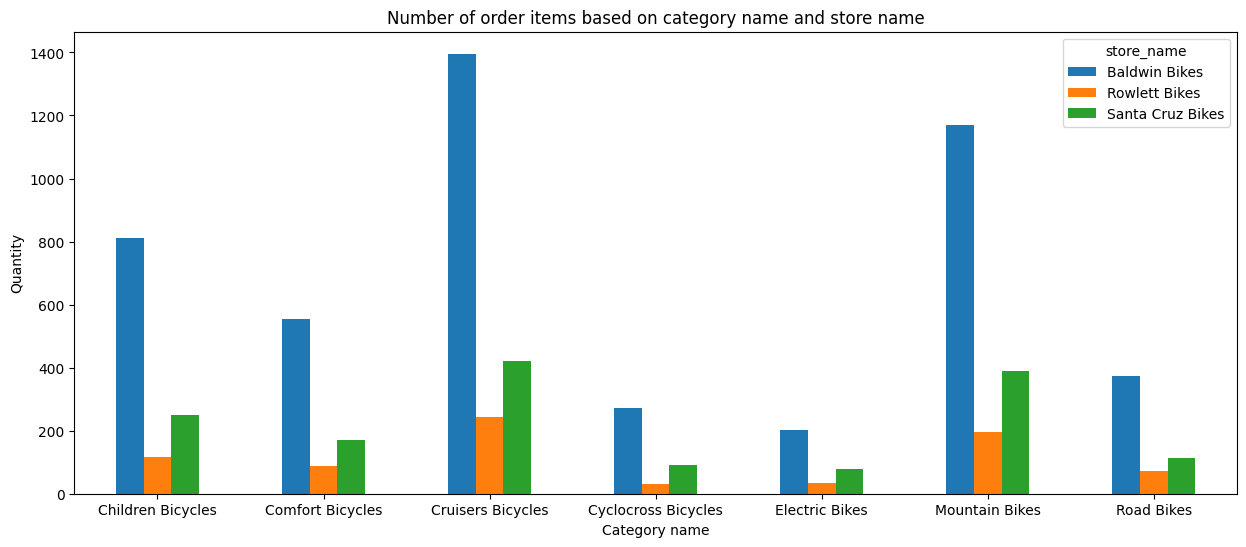

In [ ]:
# Membuat plot bar
ax = result2.plot(kind='bar', figsize=(15, 6))
plt.title('Number of order items based on category name and store name')
plt.xlabel('Category name')
plt.ylabel('Quantity')
plt.xticks(rotation=0)
plt.show()


### No. of order items based on category name from Baldwin Bikes.

In [ ]:
# Baca semua tabel yang diperlukan dari database
categories = pd.read_sql_query('SELECT * FROM categories', db)
products = pd.read_sql_query('SELECT * FROM products', db)
order_items = pd.read_sql_query('SELECT * FROM order_items', db)
orders = pd.read_sql_query('SELECT * FROM orders', db)
stores = pd.read_sql_query('SELECT * FROM stores', db)


In [ ]:
# Gabungkan tabel-tabel yang diperlukan menggunakan Pandas merge
df = pd.merge(categories, products, on='category_id', how='inner')  # Join categories and products
df = pd.merge(df, order_items, on='product_id', how='inner')         # Join with order_items
df = pd.merge(df, orders, on='order_id', how='inner')                # Join with orders
df = pd.merge(df, stores, on='store_id', how='inner')                # Join with stores


In [ ]:
# Filter data berdasarkan store_name = "Baldwin Bikes"
df_filtered = df[df['store_name'] == 'Baldwin Bikes']


In [ ]:
# Lakukan agregasi dan pengelompokan sesuai dengan query
result3 = df_filtered.groupby(['category_name', 'store_name'], as_index=False)['quantity'].sum()


In [ ]:
# Mengganti nama kolom 'quantity' menjadi 'total_quantity_per_category' untuk kejelasan
result3 = result3.rename(columns={'quantity': 'total_quantity_per_category'})


In [ ]:
# Urutkan hasil berdasarkan category_name
result3 = result3.sort_values(by=['category_name'])
result3


store_name,Baldwin Bikes
category_name,
Children Bicycles,811
Comfort Bicycles,555
Cruisers Bicycles,1396
Cyclocross Bicycles,271
Electric Bikes,202
Mountain Bikes,1170
Road Bikes,374


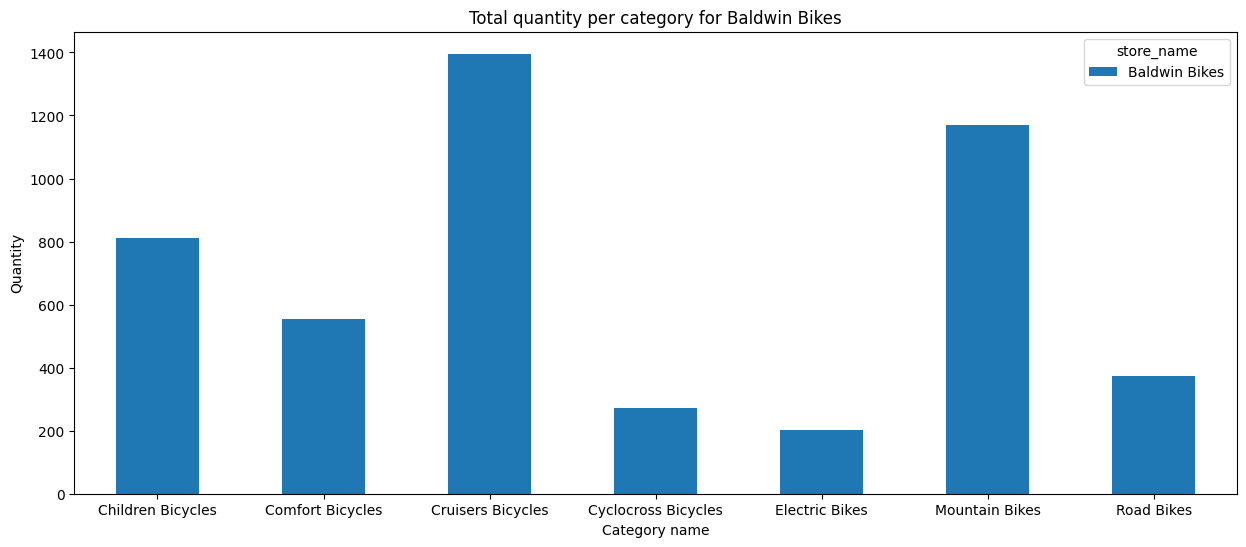

In [ ]:
# Untuk unstacking dan plotting
result3 = result3.groupby(['category_name', 'store_name'])['total_quantity_per_category'].sum().unstack().fillna(0)

# Membuat plot bar
ax = result3.plot(kind='bar', figsize=(15, 6))
plt.title('Total quantity per category for Baldwin Bikes')
plt.xlabel('Category name')
plt.ylabel('Quantity')
plt.xticks(rotation=0)
plt.show()


### Total sales in Santa Cruz Bikes based on year month

In [ ]:
# Baca tabel yang diperlukan dari database
order_items = pd.read_sql_query('SELECT * FROM order_items', db)
orders = pd.read_sql_query('SELECT * FROM orders', db)
stores = pd.read_sql_query('SELECT * FROM stores', db)

# Gabungkan tabel-tabel yang diperlukan menggunakan Pandas merge
df = pd.merge(order_items, orders, on='order_id', how='inner')  # Join order_items and orders
df = pd.merge(df, stores, on='store_id', how='inner')            # Join with stores


In [ ]:
# Filter data berdasarkan store_name = "Santa Cruz Bikes"
df_filtered = df[df['store_name'] == 'Santa Cruz Bikes']

# Membuat kolom 'year_month' dari kolom 'order_date' yang sudah ada
df_filtered['year_month'] = pd.to_datetime(df_filtered['order_date']).dt.strftime('%Y %m')

# Menghitung total harga dengan formula: quantity * list_price * (1 - discount)
df_filtered['total_price'] = df_filtered['quantity'] * df_filtered['list_price'] * (1 - df_filtered['discount'])


<ipython-input-115-ccdb93e0441c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year_month'] = pd.to_datetime(df_filtered['order_date']).dt.strftime('%Y %m')
<ipython-input-115-ccdb93e0441c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['total_price'] = df_filtered['quantity'] * df_filtered['list_price'] * (1 - df_filtered['discount'])


In [ ]:
# Lakukan agregasi berdasarkan year_month
result4 = df_filtered.groupby('year_month', as_index=False)['total_price'].sum()

# Urutkan hasil berdasarkan year_month
result4 = result4.sort_values(by='year_month')

# Menampilkan hasil
result4


,year_month,total_price
0,2016 01,71760.3064
1,2016 02,35255.4513
2,2016 03,46817.6251
3,2016 04,34230.6401
4,2016 05,28095.2399
5,2016 06,41554.1683
6,2016 07,21258.8857
7,2016 08,44803.6003
8,2016 09,65159.6319
9,2016 10,69175.4980


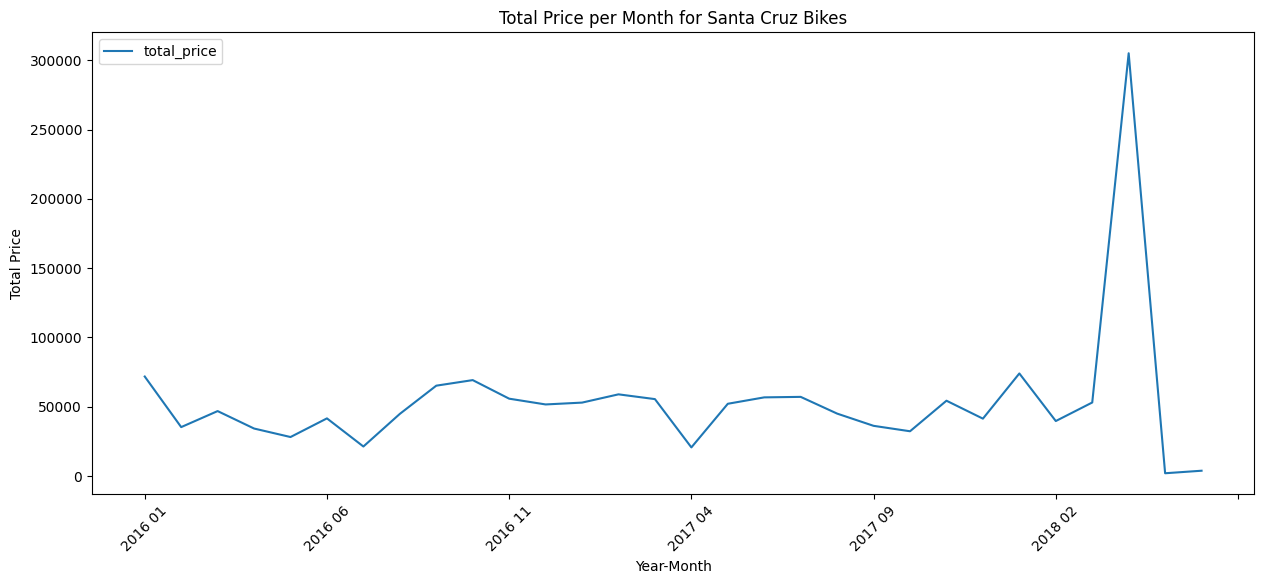

In [ ]:
# Membuat plot garis untuk total_price per bulan
ax = result4.plot(x='year_month', y='total_price', kind='line', figsize=(15, 6))
plt.title('Total Price per Month for Santa Cruz Bikes')
plt.xlabel('Year-Month')
plt.ylabel('Total Price')
plt.xticks(rotation=45)
plt.show()


### Total sales in Rowlett Bikes based on year month


In [ ]:
# Baca tabel yang diperlukan dari database
order_items = pd.read_sql_query('SELECT * FROM order_items', db)
orders = pd.read_sql_query('SELECT * FROM orders', db)
stores = pd.read_sql_query('SELECT * FROM stores', db)

# Gabungkan tabel order_items dan orders berdasarkan order_id
df = pd.merge(order_items, orders, on='order_id', how='inner')

# Gabungkan hasil dengan stores berdasarkan store_id
df = pd.merge(df, stores, on='store_id', how='inner')

In [ ]:
# Filter berdasarkan store_name = "Rowlett Bikes"
df_filtered = df[df['store_name'] == 'Rowlett Bikes']

# Membuat kolom 'year_month' dari kolom 'order_date' yang ada
df_filtered['year_month'] = pd.to_datetime(df_filtered['order_date']).dt.strftime('%Y %m')


<ipython-input-119-8ba2ea9d9972>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year_month'] = pd.to_datetime(df_filtered['order_date']).dt.strftime('%Y %m')


In [ ]:
# Hitung total harga berdasarkan formula yang diberikan
df_filtered['total_price'] = df_filtered['quantity'] * df_filtered['list_price'] * (1 - df_filtered['discount'])


<ipython-input-120-db98e40cd3fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['total_price'] = df_filtered['quantity'] * df_filtered['list_price'] * (1 - df_filtered['discount'])


In [ ]:
# Lakukan agregasi berdasarkan year_month
result5 = df_filtered.groupby('year_month', as_index=False)['total_price'].sum()

# Urutkan berdasarkan year_month
result5 = result5.sort_values(by='year_month')

# Menampilkan hasil
result5


,year_month,total_price
0,2016 01,10491.8209
1,2016 02,18654.9644
2,2016 03,23443.9118
3,2016 04,12421.4269
4,2016 05,26495.1169
5,2016 06,29986.5696
6,2016 07,10977.0501
7,2016 08,37859.4876
8,2016 09,43563.3262
9,2016 10,13650.8501


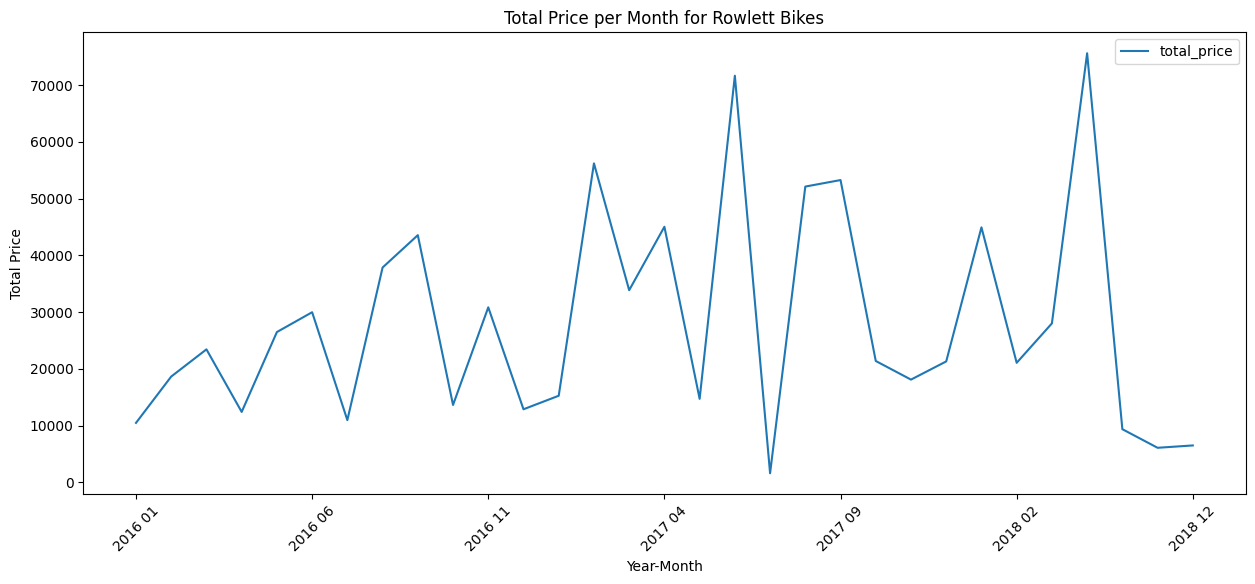

In [ ]:
# Membuat plot garis untuk total_price per bulan
ax = result5.plot(x='year_month', y='total_price', kind='line', figsize=(15, 6))
plt.title('Total Price per Month for Rowlett Bikes')
plt.xlabel('Year-Month')
plt.ylabel('Total Price')
plt.xticks(rotation=45)
plt.show()


### Total sales in Baldwin Bikes based on year month

In [ ]:
# Baca tabel yang diperlukan dari database
order_items = pd.read_sql_query('SELECT * FROM order_items', db)
orders = pd.read_sql_query('SELECT * FROM orders', db)
stores = pd.read_sql_query('SELECT * FROM stores', db)

# Gabungkan tabel yang diperlukan untuk analisis
merged_data = order_items.merge(orders, on='order_id', how='inner') \
    .merge(stores, on='store_id', how='inner')

In [ ]:
# Baca tabel yang diperlukan dari database
order_items = pd.read_sql_query('SELECT * FROM order_items', db)
orders = pd.read_sql_query('SELECT * FROM orders', db)
stores = pd.read_sql_query('SELECT * FROM stores', db)

# Gabungkan tabel yang diperlukan untuk analisis
merged_data = order_items.merge(orders, on='order_id', how='inner') \
    .merge(stores, on='store_id', how='inner')


In [ ]:
# Filter data berdasarkan store_name = 'Baldwin Bikes'
baldwin_bikes_data = merged_data[merged_data['store_name'] == 'Baldwin Bikes']

# Tambahkan kolom 'year_month' berdasarkan 'order_date'
baldwin_bikes_data['year_month'] = pd.to_datetime(baldwin_bikes_data['order_date']).dt.strftime('%Y %m')

# Hitung total harga untuk setiap 'year_month'
result6 = baldwin_bikes_data.groupby('year_month').agg(
    total_price=('quantity', lambda x: (x * baldwin_bikes_data.loc[x.index, 'list_price'] *
                                        (1 - baldwin_bikes_data.loc[x.index, 'discount'])).sum())
).reset_index()

# Konversi kolom 'year_month' ke tipe datetime
result6['year_month'] = pd.to_datetime(result6['year_month'], format='%Y %m')

# Tampilkan hasil untuk memastikan
result6

<ipython-input-125-ce9a60cd5c40>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baldwin_bikes_data['year_month'] = pd.to_datetime(baldwin_bikes_data['order_date']).dt.strftime('%Y %m')


,year_month,total_price
0,2016-01-01,132894.2968
1,2016-02-01,102201.9071
2,2016-03-01,110338.7916
3,2016-04-01,120491.9842
4,2016-05-01,150679.6523
5,2016-06-01,139021.3866
6,2016-07-01,167320.8731
7,2016-08-01,142994.2888
8,2016-09-01,164368.6516
9,2016-10-01,129251.7324


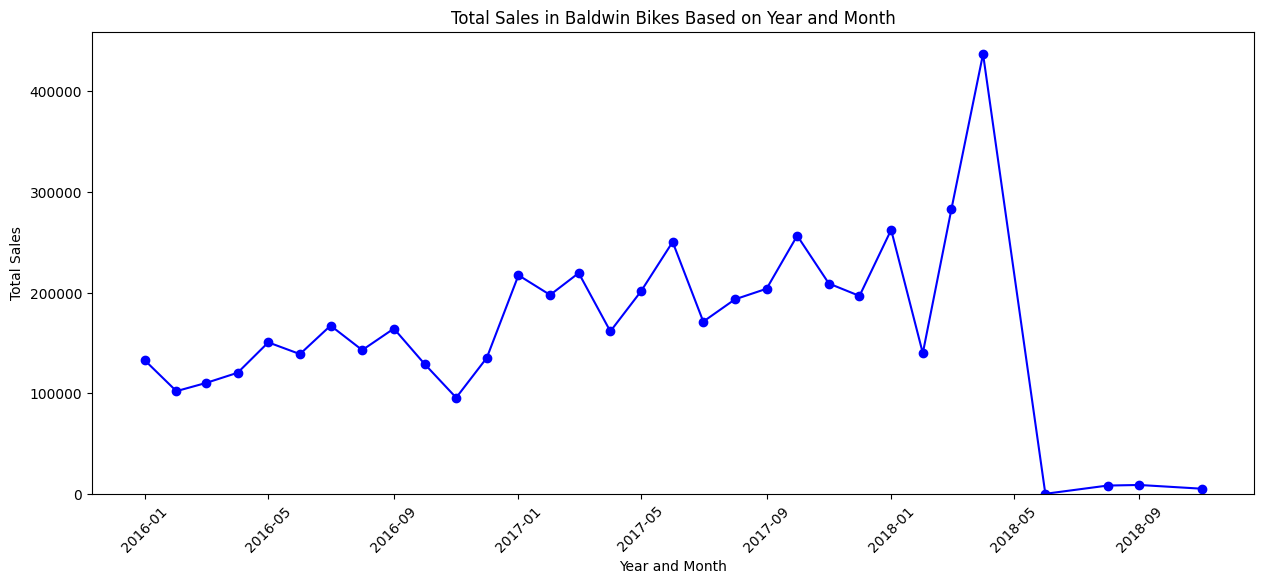

In [ ]:
# Menyiapkan ukuran gambar untuk plot
plt.subplots(figsize=(15, 6))

# Membuat plot garis antara 'year_month' dan 'total_price'
plt.plot(result6['year_month'], result6['total_price'], marker='o', color='b')

# Menambahkan judul dan label
plt.title('Total Sales in Baldwin Bikes Based on Year and Month')
plt.xlabel('Year and Month')
plt.ylabel('Total Sales')

# Menetapkan batas bawah pada sumbu y
plt.ylim(bottom=0)

# Menampilkan grafik
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Baca tabel produk dari database
products = pd.read_sql_query('SELECT * FROM products', db)

### Staff with the highest number of orders

In [ ]:
query7 = '''
SELECT (S.first_name|| ' '|| S.last_name) AS full_name,S.staff_id, COUNT(DISTINCT O.order_id) as Num_of_Orders

FROM staffs S
JOIN orders O ON S.staff_id=O.staff_id
GROUP BY S.staff_id,full_name
ORDER BY   COUNT(DISTINCT O.order_id) DESC
LIMIT 1;
'''
result7 = pd.read_sql_query(query7, db)
result7

,full_name,staff_id,Num_of_Orders
0,Marcelene Boyer,6,553


### Staff with the lowest number of orders

In [ ]:
query8 = '''
SELECT (staffs.first_name||" "|| staffs.last_name) AS full_name,staffs.staff_id, COUNT(orders.order_id) AS num_of_orders
FROM orders
JOIN staffs ON orders.staff_id = staffs.staff_id
GROUP BY staffs.staff_id
HAVING num_of_orders = (SELECT MIN(x)
                          FROM (SELECT s.staff_id, s.first_name, s.last_name, COUNT(o.order_id) AS x
                                FROM orders AS o
                                JOIN staffs AS s ON o.staff_id = s.staff_id
                                GROUP BY s.staff_id) AS y)
'''

result8 = pd.read_sql_query(query8, db)
result8

,full_name,staff_id,num_of_orders
0,Layla Terrell,9,86
